# Statistical Learning Project

## Step 1: Import the neccessary libraries

In [201]:
#importing the required libraries
import pandas as pd
import numpy as np

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set(color_codes=True)        #adds color background (have to kill the kernel to see the changes of color)
%matplotlib inline 

#For hypothesis testing
import scipy.stats as stats     
import copy

## Step 2: Read the data as a data frame

In [202]:
indata = pd.read_csv('C:\\Users\\Rakesh Gowda S N\\Documents\\Projects\\Project 1 - AS\\insurance.csv')
dframe = pd.DataFrame(indata)

## Step 3: Perform basic EDA which should include the following and print out your insights at every step

### a. Shape of the data 

In [203]:
print('Shape of the data is: ', dframe.shape)
print('')
print('First 5 rows of the data: ')
print(dframe.head(5))
print('')
print('Last 5 rows of the data: ')
print(dframe.tail(5))

Shape of the data is:  (1338, 7)

First 5 rows of the data: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Last 5 rows of the data: 
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


### b. Data type of each attribute

In [204]:
print('Attributes of datatypes: ')
print(dframe.dtypes)

Attributes of datatypes: 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### c. Checking the presence of missing values

In [205]:
missing = (dframe.isnull())
print('Missing values')
print(missing)
print('')
print('Count of missing values in each column')
print(dframe.isnull().sum())

Missing values
        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]

Count of missing values in each column
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [206]:
print('There are no missing values in the dataset.')

There are no missing values in the dataset.


### d. 5 point summary of numerical attributes

In [207]:
print('5 point summary of numerical attributes are as below:')
print(dframe.describe())

5 point summary of numerical attributes are as below:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

Distribution plot of BMI: 


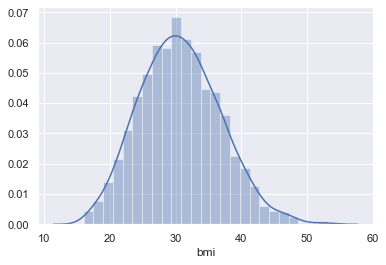

In [208]:
print('Distribution plot of BMI: ')
sns.distplot(dframe['bmi']);

In [209]:
print('From the graph BMI has normal distribution.')

From the graph BMI has normal distribution.


Distribution plot of Age: 


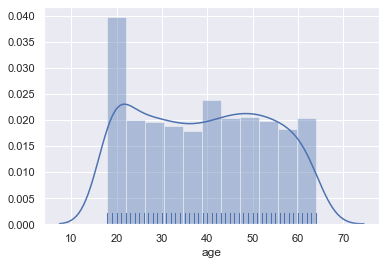

In [210]:
print('Distribution plot of Age: ')
sns.distplot(dframe['age'],rug=True);

In [211]:
print('From the graph Age has somewhat uniform distribution.')

From the graph Age has somewhat uniform distribution.


Distribution plot of Charges: 


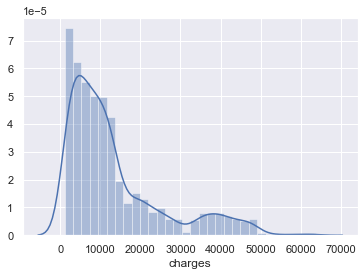

In [212]:
print('Distribution plot of Charges: ')
sns.distplot(dframe['charges']);

In [213]:
print('From the graph Charges are positively skewed.')

From the graph Charges are positively skewed.


### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [214]:
dframe2 = dframe.copy()
del dframe2['children']

print('The skewness of age, bmi and charges are as below:')
dframe2.skew(axis = 0)

The skewness of age, bmi and charges are as below:


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

In [215]:
print('Data in columns age and bmi are fairly symmetrical whereas positively skewed in column charges ')

Data in columns age and bmi are fairly symmetrical whereas positively skewed in column charges 


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Outliers in BMI column


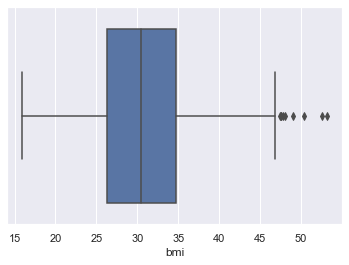

In [216]:
sns.boxplot(dframe['bmi']);
print('Outliers in BMI column')

In [217]:
print('There is a presence of outliers in BMI column.')

There is a presence of outliers in BMI column.


Outliers in Age column


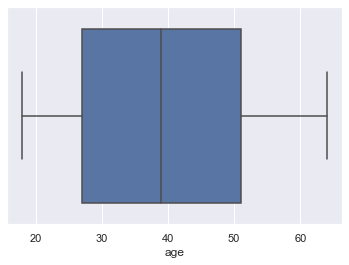

In [218]:
sns.boxplot(dframe['age']);
print('Outliers in Age column')

In [219]:
print('There are no outliers in Age column.')

There are no outliers in Age column.


Outliers in Charges column


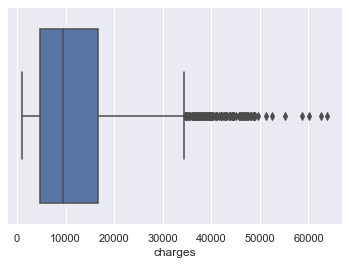

In [220]:
sns.boxplot(dframe['charges']);
print('Outliers in Charges column')

In [221]:
print('There are a significant number of outliers in Charges column.')

There are a significant number of outliers in Charges column.


In [222]:
print('There are no outliers in age column but there is a presence of outliers in bmi and charges columns ')

There are no outliers in age column but there is a presence of outliers in bmi and charges columns 


### h. Distribution of categorical columns (including children)

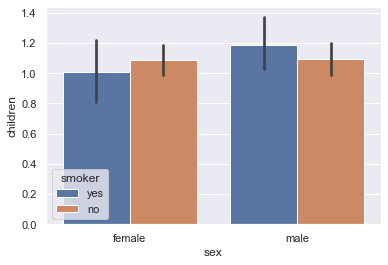

In [223]:
sns.barplot(dframe['sex'],dframe['children'],dframe['smoker']);

In [224]:
print('1) Male smokers are having more number of children(dependents compared to female smokers.')
print('2) Non smokers of both the gender have similar number of children.')

1) Male smokers are having more number of children(dependents compared to female smokers.
2) Non smokers of both the gender have similar number of children.


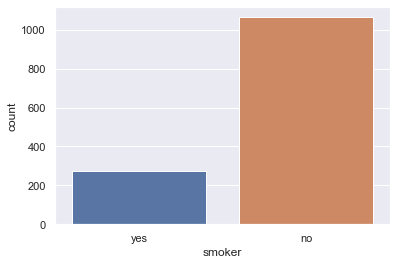

In [225]:
sns.countplot(dframe['smoker']);

In [226]:
print('There are very less number of smokers compared to non-smokers.')

There are very less number of smokers compared to non-smokers.


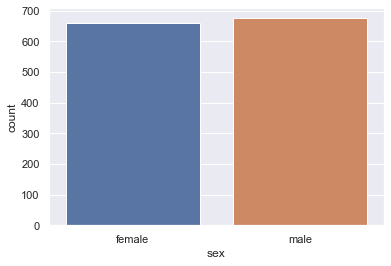

In [227]:
sns.countplot(dframe['sex']);

In [228]:
print('Both sex are almost equal in number.')

Both sex are almost equal in number.


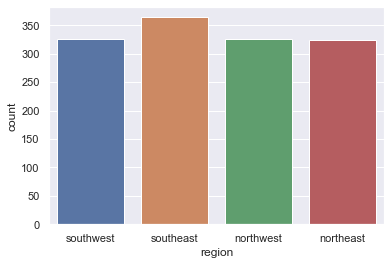

In [229]:
#sns.swarmplot(dframe['region'],dframe['children']);
sns.countplot(dframe['region']);

In [230]:
print('Southeast region has slightly higher instances compared to other regions.')

Southeast region has slightly higher instances compared to other regions.


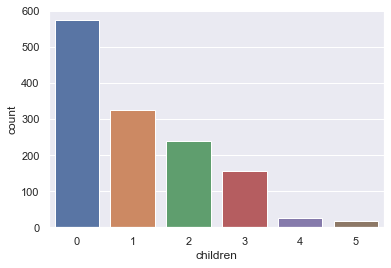

In [231]:
sns.countplot(dframe['children']);

In [232]:
print('Instances with no child is higher compared to other instances as the number of children increases.')

Instances with no child is higher compared to other instances as the number of children increases.


### i. Pair plot that includes all the columns of the data frame

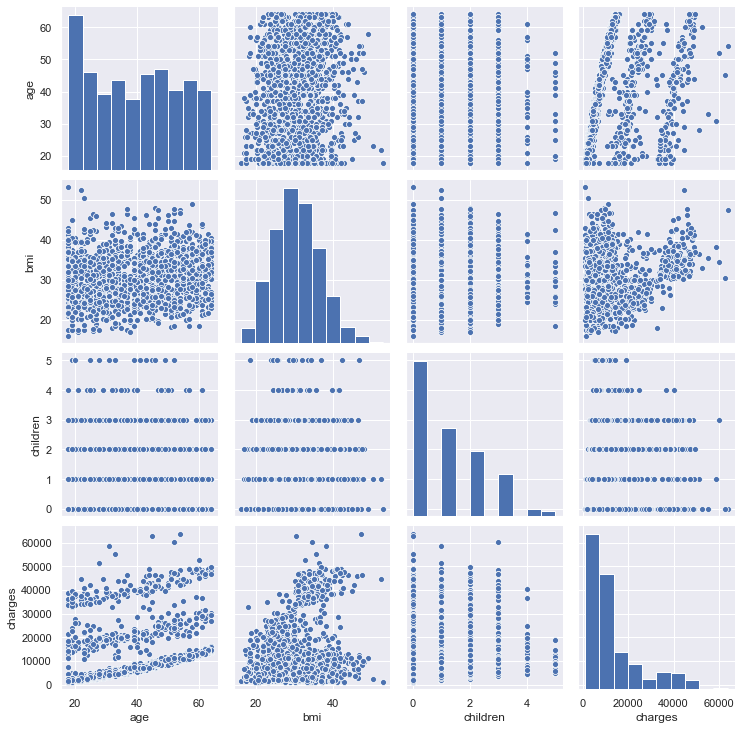

In [233]:
sns.pairplot(dframe);

In [234]:
dframe3 = dframe.copy()
# dframe3['sex'] = dframe3['sex'].replace(['female','male'],['0','1'])
# dframe3.head()
# dframe3.dtypes

In [235]:
dframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [236]:
#replace and typecasting
dframe3['sex'] = dframe3['sex'].apply(lambda x: x.replace('female', '0').replace('male', '1')).astype('int')
dframe3['smoker'] = dframe3['smoker'].apply(lambda x: x.replace('yes', '0').replace('no', '1')).astype('int')
dframe3['region'] = dframe3['region'].apply(lambda x: x.replace('southwest', '0').replace('southeast', '1').replace('northeast', '2').replace('northwest', '3')).astype('int')
print(dframe3.head())
dframe3.dtypes

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       0       0  16884.92400
1   18    1  33.770         1       1       1   1725.55230
2   28    1  33.000         3       1       1   4449.46200
3   33    1  22.705         0       1       3  21984.47061
4   32    1  28.880         0       1       3   3866.85520


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

Pairplot of all columns of dataset


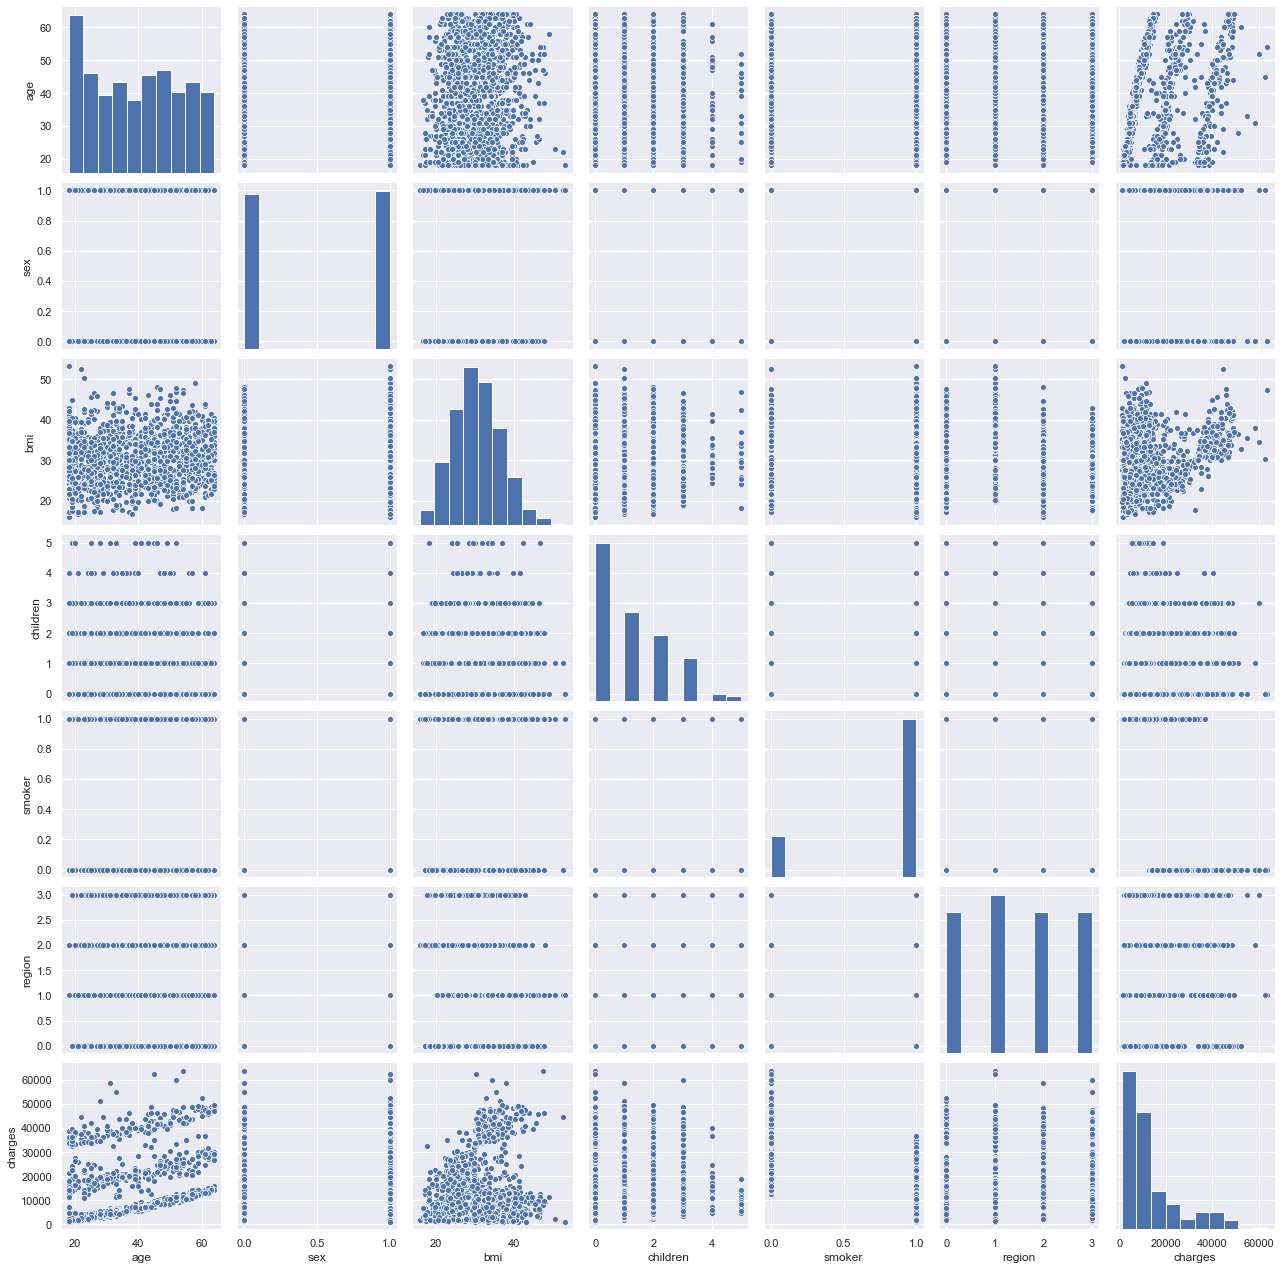

In [237]:
print('Pairplot of all columns of dataset')
sns.pairplot(dframe3);

In [238]:
print('1. Charges are somewhat more to older people compared to younger ones.')
print('2. Small number of males have higher BMI compared to females.')
print('3. Few instances with higher BMI are charged more.')
print('4. Instances having 4 or more children have claimed less charges.')
print('5. Charges are more for smokers compared to non-smokers.')
print('6. People in southeast are somewhat having higher BMI.')

1. Charges are somewhat more to older people compared to younger ones.
2. Small number of males have higher BMI compared to females.
3. Few instances with higher BMI are charged more.
4. Instances having 4 or more children have claimed less charges.
5. Charges are more for smokers compared to non-smokers.
6. People in southeast are somewhat having higher BMI.


## 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

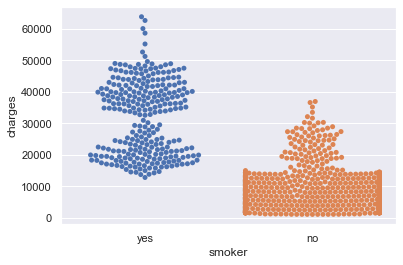

In [239]:
sns.swarmplot(dframe['smoker'],dframe['charges']);

In [240]:
print('As per the swarmplot we can see that smokers have slightly higher charges compared to non-smokers.')

As per the swarmplot we can see that smokers have slightly higher charges compared to non-smokers.


In [241]:
#Hypothesis testing
Ho = "Charges of smokers and non-smokers does not differ"       #Null hypothesis
Ha = "Charges of smokers and non-smokers differ"                #Alternate hypothesis

#Perform two sample T-test since there are samples from 2 different populations 
x = np.array(dframe[dframe.smoker == 'yes'].charges)   #smokers
y = np.array(dframe[dframe.smoker == 'no'].charges)    #non-smokers

t_stat, p_value = stats.ttest_ind(x,y)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')


Charges of smokers and non-smokers differ as the p_value (8.271435842177219e-283) < 0.05 and thus null hypothesis is rejected.


### b. Does bmi of males differ significantly from that of females? 

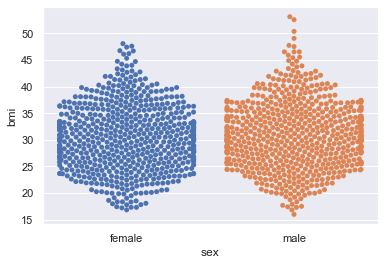

In [242]:
sns.swarmplot(dframe['sex'],dframe['bmi']);

In [243]:
print('As per the swarmplot we can see that gender is not affecting BMI values.')

As per the swarmplot we can see that gender is not affecting BMI values.


In [244]:
#Hypothesis testing
Ho = "Gender does not affect BMI values"        #Null hypothesis
Ha = "Gender affects BMI values"                #Alternate hypothesis

#Perform two sample T-test since there are samples from 2 different populations 
x = np.array(dframe[dframe.sex == 'female'].bmi)   #BMI of female
y = np.array(dframe[dframe.sex == 'male'].bmi)     #BMI of male

t_stat, p_value = stats.ttest_ind(x,y)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')


Gender does not affect BMI values as the p_value (0.08997637178984932) > 0.05 and thus null hypothesis is accepted.


### c. Is the proportion of smokers significantly different in different genders?

In [245]:
#Hypothesis testing
Ho = "Proportion of smokers are not different in different genders"        #Null hypothesis
Ha = "Proportion of smokers are different in different genders"            #Alternate hypothesis

#Perform chi-squared test since both inputs are categorical in nature and mutually exclusive
crosstab = pd.crosstab(dframe['smoker'],dframe['sex'])  # Contingency table

chi_stat, p_value, dof, exp = stats.chi2_contingency(crosstab)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

Proportion of smokers are different in different genders as the p_value (0.006548143503580696) < 0.05 and thus null hypothesis is rejected.


### d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [246]:
#Hypothesis testing
Ho = "BMI is not affected by number of children"        #Null hypothesis
Ha = "BMI is affected by number of children"            #Alternate hypothesis

#Perform one way ANOVA since there is a categorical independent variable(BMI) and a quantitative dependent variable(children).
dframe_fem = copy.deepcopy(dframe[dframe['sex'] == 'female'])


zero = dframe_fem[dframe_fem.children == 0]['bmi']
one  = dframe_fem[dframe_fem.children == 1]['bmi']
two  = dframe_fem[dframe_fem.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

BMI is not affected by number of children as the p_value (0.7158579926754841) > 0.05 and thus null hypothesis is accepted.
